Data: 
 [(203.00168320818912, 1353.2450538887279), (1351.4816503493105, 996.3059546354029), (1860.3888299251594, 187.54106382955337), (512.361183920776, 298.8617300356744), (61.363835435592094, 1109.4366779432335), (1040.9802702664642, 621.4526693459757), (1280.0516657589587, 851.2020256028472), (1259.771859820539, 481.05184788992796), (1066.136672889247, 164.54219678545746), (715.7095084931318, 1061.1664328547806), (335.02292394993185, 27.881883721169398), (104.29469694052607, 74.8007546052143), (670.0418834862769, 1104.2716778592603), (55.49430977291192, 744.5200560165359), (408.52834951053694, 389.51303451320916), (1743.4207082921946, 1167.1977437269802), (1253.478845947188, 99.0256267449634), (1802.935248457438, 1357.585340212117), (1937.3688850234566, 1334.4913405802126), (1821.6625261142294, 779.1478239296807), (758.6518345127357, 1890.2515417312204), (758.636701443564, 714.1290482561582), (372.9646187897804, 115.98377245087255), (1681.4057308462018, 188.99632500185604), (1012.70

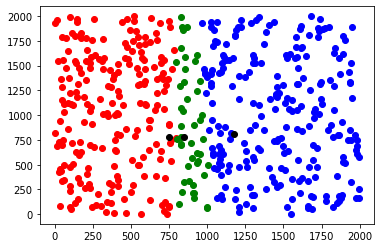

CLUSTER 15
 {0: [(203.00168320818912, 1353.2450538887279), (61.363835435592094, 1109.4366779432335), (715.7095084931318, 1061.1664328547806), (670.0418834862769, 1104.2716778592603), (55.49430977291192, 744.5200560165359), (758.6518345127357, 1890.2515417312204), (865.3488050184575, 1161.1339001066726), (243.20211697314554, 912.3130926370507), (3.8971897430115643, 1924.9758359457592), (557.6718009542953, 1123.40264204784), (190.45188326247307, 1180.8834335392771), (718.8709142108934, 1559.3684219978063), (139.88317740288525, 1233.1406863226748), (295.48523659157235, 1160.461715855114), (164.6585215333931, 732.924416483987), (572.1573603236247, 1581.4139372090617), (547.5105214508238, 1307.4300565913618), (781.7227709194916, 1661.5704690847745), (28.887532410738494, 724.3619276351329), (24.97134195039208, 1543.7892851436159), (349.7818720862582, 1296.3986089983196), (584.4459513583587, 1555.3526065597252), (230.99230832216898, 1476.5242670130374), (351.6565052105432, 993.5652421119148),

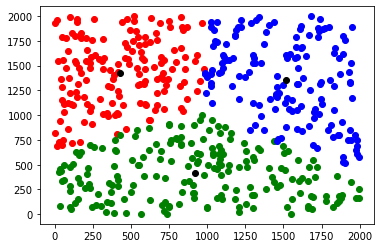

In [ ]:
# Martin Silva C
# 20.470.450-3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# variables a ser utilizadas
num = 500 # cantidad de datos
datos = [] # lista vacia inicial de prueba
i = 0 # para iterar
k = 3 # cantidad de clusters y centroides
centroid=[]
cluster = {}


# para testeo con datos al azar
while(i != num):
  # no supe como guardar en una variable la dimension de los datos al azar, asi que aqui quedan comentados los de 1, 2, 3 y 4 dimensiones.
  # datos.append((np.random.uniform(0, 2000))
  datos.append((np.random.uniform(0, 2000),np.random.uniform(0, 2000)))
  # datos.append((np.random.uniform(0, 2000),np.random.uniform(0, 2000),np.random.uniform(0, 2000)))
  # datos.append((np.random.uniform(0, 2000),np.random.uniform(0, 2000),np.random.uniform(0, 2000),np.random.uniform(0, 2000)))
  i+=1
print("Data: \n",datos,"\n")

def iniciarCentroide(C ,data): # Cantidad de centroides y datos a ser utilizados, segun dimensiones
  centroidBundle =[] # guardar centroides para mostrarlos luego

  # generar centroides segun valor ingresado C, guardarlas
  for centroid in range(C):
    centroid = np.random.uniform( min(data), max(data), len(datos[0])) #rango dentro de la data anteriormente ingresada y dimensiones.
    centroidBundle.append(centroid)
  return centroidBundle

centroidBundle = iniciarCentroide(k, datos)

#Cantidad de clusters, de acuerdo a cantidad de centroides
for i in range(k):
    cluster[i] = []


#definir distancias entre centroides y datos para crear clusters
def distanceFromCentroid():
  for data in datos:
    distance = []
    for j in range(k):
      distance.append(np.linalg.norm(data - centroidBundle[j]))
    cluster[distance.index(min(distance))].append(data)

distanceFromCentroid()
print("CLUSTER 1\n",cluster)

# luego, debemos crear nuevos cluster y nuevos centroides hasta lograr nuestro resultado optimo

# nuevos clusters
def nuevosClusters():
  cluster = {}
  for i in range(k):
    cluster[i] = []
  for data in datos:
    distance = []
    for j in range(k):
      distance.append(np.linalg.norm(data - centroidBundle[j]))
    cluster[distance.index(min(distance))].append(data)
  return cluster  


# nuevos centroides
def nuevosCentroides(centroidBundle, cluster, k):
  for i in range(k):
      centroidBundle[i] = np.average(cluster[i], axis=0)
  return centroidBundle

# Colores a ser utilizados (Agregar mas colores si es necesario)
colors = list("rgbcmyk")

# Plot, segun datos totales en clustere y centroides; siempre de color negro
''' LIMITACION: No supe como graficar para datos de 3+ dimensiones, por lo que si se requiere corroborar en N dimensiones mayores a 2, deben comentarse los plot '''
for j, d in cluster.items():
  for data in d:
    x, y = data
    plt.scatter(x, y, color=colors[j])

for data in centroidBundle:
   x, y = data
   plt.scatter(x, y, color='Black')

plt.show()
# Actualizando variables
cluster= nuevosClusters()
centroidBundle = nuevosCentroides(centroidBundle, cluster, k)

# Variables Auxiliares para comparacion
clusterIteration= nuevosClusters()
centroidBundleIteration = nuevosCentroides(centroidBundle, cluster, k)

# Seguir llamando a las funciones hasta que cluster == clusterIteration.
n = 1 # para ver cuantas veces se itero
while(clusterIteration != cluster):
  cluster= nuevosClusters()
  centroidBundle = nuevosCentroides(centroidBundle, cluster, k)
  clusterIteration= nuevosClusters()
  centroidBundleIteration = nuevosCentroides(centroidBundle, cluster, k)
  n += 1


print(f"CLUSTER {n}\n",clusterIteration)

# Plot final, para un antes y despues (Nuevamente verificar colores si mas son necesarios)
colors = list("rgbcmyk")

for j, d in cluster.items():
  for data in d:
    x, y = data
    plt.scatter(x, y, color=colors[j])

for data in centroidBundle:
   x, y = data
   plt.scatter(x, y, color='Black')

plt.show()